<a href="https://colab.research.google.com/github/Rajkumars777/lTID-PS6/blob/main/Feature%20Enginnering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV (from Colab "files" section")
df = pd.read_csv("/content/agriculture_dataset.csv")

print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


In [48]:
# Drop Farm_ID (this was the cause of all previous errors)
df = df.drop(columns=["Farm_ID"])

# Remove duplicates
df = df.drop_duplicates()

# Reset index
df.reset_index(drop=True, inplace=True)

print("Cleaned dataset:")
df.head()


Cleaned dataset:


,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


In [49]:
# Add new engineered features
df["Yield_per_Acre"] = df["Yield(tons)"] / df["Farm_Area(acres)"]
df["Fertilizer_Efficiency"] = df["Yield(tons)"] / df["Fertilizer_Used(tons)"]
df["Water_Efficiency"] = df["Yield(tons)"] / df["Water_Usage(cubic meters)"]

print("New engineered features added!")
df.head()


New engineered features added!


,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters),Yield_per_Acre,Fertilizer_Efficiency,Water_Efficiency
0,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20,0.043837,1.773956,0.000188
1,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54,2.298340,8.995807,0.000624
2,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56,0.109270,11.491409,0.000443
3,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23,0.089635,10.265060,0.000751
4,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69,0.319268,5.195678,0.000462


In [50]:
X = df.drop(columns=["Yield(tons)"])
y = df["Yield(tons)"]


In [51]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_cols, categorical_cols


(Index(['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)',
        'Water_Usage(cubic meters)', 'Yield_per_Acre', 'Fertilizer_Efficiency',
        'Water_Efficiency'],
       dtype='object'),
 Index(['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], dtype='object'))

In [52]:
preprocess = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42)
}

results = {}


In [54]:
for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    scores = cross_val_score(pipe, X, y, cv=5, scoring="r2")
    results[name] = scores.mean()

results


{'Linear Regression': np.float64(-0.8921310601073422),
 'Ridge Regression': np.float64(-0.2386792222714515),
 'Random Forest': np.float64(0.5965139940234762)}

In [55]:
best_model_name = max(results, key=results.get)
best_model_name


'Random Forest'

In [56]:
best_model = Pipeline([
    ("preprocess", preprocess),
    ("model", models[best_model_name])
])

best_model.fit(X, y)

print("Final model trained successfully!")


Final model trained successfully!


In [57]:
sample = X.iloc[0:1]

prediction = best_model.predict(sample)
prediction


array([14.1467])

In [58]:
# Extract the final trained RF model
rf = best_model.named_steps["model"]

# Get feature names after preprocessing
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
encoded_cat = ohe.get_feature_names_out(categorical_cols)

all_features = np.concatenate([numeric_cols, encoded_cat])

importances = rf.feature_importances_

feat_df = pd.DataFrame({"Feature": all_features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

feat_df.head(15)


,Feature,Importance
6,Water_Efficiency,0.396475
5,Fertilizer_Efficiency,0.220603
4,Yield_per_Acre,0.157530
3,Water_Usage(cubic meters),0.066160
0,Farm_Area(acres),0.051177
2,Pesticide_Used(kg),0.028713
1,Fertilizer_Used(tons),0.023372
22,Soil_Type_Clay,0.005693
18,Irrigation_Type_Flood,0.005500
25,Soil_Type_Sandy,0.003792


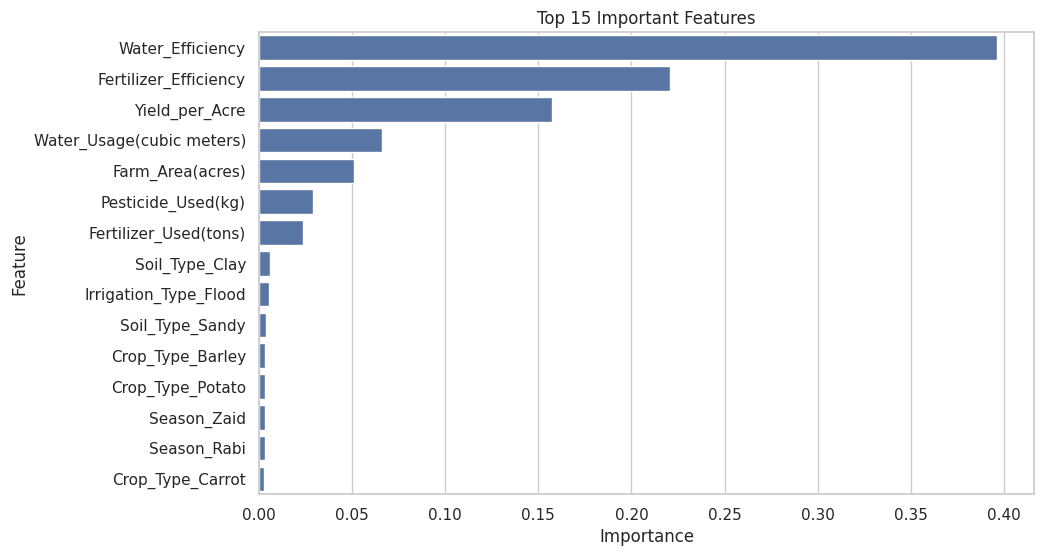

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(15))
plt.title("Top 15 Important Features")
plt.show()


In [60]:
print("Model Performance (Mean CV R2 Scores):\n")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

print("\nBest Model:", best_model_name)


Model Performance (Mean CV R2 Scores):

Linear Regression: -0.8921
Ridge Regression: -0.2387
Random Forest: 0.5965

Best Model: Random Forest


In [61]:
new_data = pd.DataFrame({
    "Crop_Type": ["Tomato"],
    "Farm_Area(acres)": [150],
    "Irrigation_Type": ["Sprinkler"],
    "Fertilizer_Used(tons)": [6],
    "Pesticide_Used(kg)": [3],
    "Soil_Type": ["Loamy"],
    "Season": ["Kharif"],
    "Water_Usage(cubic meters)": [60000],
    "Yield_per_Acre": [6/150],
    "Fertilizer_Efficiency": [6/6],
    "Water_Efficiency": [6/60000]
})

prediction = best_model.predict(new_data)
print("Predicted Yield (tons):", prediction[0])


Predicted Yield (tons): 9.25366666666668
